In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv('pesawat.csv')
df= pd.DataFrame(data) 
print("5 Baris Data Teratas:")
print(df.head())

5 Baris Data Teratas:
   PassengerId  Selamat  Kelas          Nama  Gender  Usia  SaudaraPasangan  \
0            1        0      3     Budi, Tn.    male  22.0                1   
1            2        1      1    Citra, Nn.  female  38.0                1   
2            3        1      3     Dewi, Nn.  female  26.0                0   
3            4        1      1  Lestari, Ny.  female  35.0                1   
4            5        0      3      Eko, Tn.    male  35.0                0   

   OrtuAnak             Tiket  HargaTiket Kabin Pelabuhan  
0         0         A/5 21171       72500   NaN         S  
1         0          PC 17599      712830   C85         C  
2         0  STON/O2. 3101282       79250   NaN         S  
3         0            113803      531000  C123         S  
4         0            373450       80500   NaN         S  


In [3]:
print("5 Baris Data Terbawah:")
print(df.tail())

5 Baris Data Terbawah:
    PassengerId  Selamat  Kelas          Nama  Gender  Usia  SaudaraPasangan  \
7             8        0      3     Hadi, An.    male   2.0                3   
8             9        1      3    Indah, Nn.  female  27.0                0   
9            10        1      2     Joko, Tn.    male  14.0                1   
10           11        1      1  Kartini, An.  female   4.0                1   
11           12        0      3    Lutfi, Tn.    male  20.0                0   

    OrtuAnak      Tiket  HargaTiket Kabin Pelabuhan  
7          1     349909      210750   NaN         S  
8          2       2650       11310   NaN         S  
9          0     237736      300700   NaN         C  
10         1    PP 9549      165000    G6         S  
11         0  A/5. 2151       72500   NaN         S  


In [4]:
print("\n informasi umum dan tipe data :")
print(df.info())


 informasi umum dan tipe data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      12 non-null     int64  
 1   Selamat          12 non-null     int64  
 2   Kelas            12 non-null     int64  
 3   Nama             12 non-null     object 
 4   Gender           12 non-null     object 
 5   Usia             11 non-null     float64
 6   SaudaraPasangan  12 non-null     int64  
 7   OrtuAnak         12 non-null     int64  
 8   Tiket            12 non-null     object 
 9   HargaTiket       12 non-null     int64  
 10  Kabin            4 non-null      object 
 11  Pelabuhan        12 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.3+ KB
None


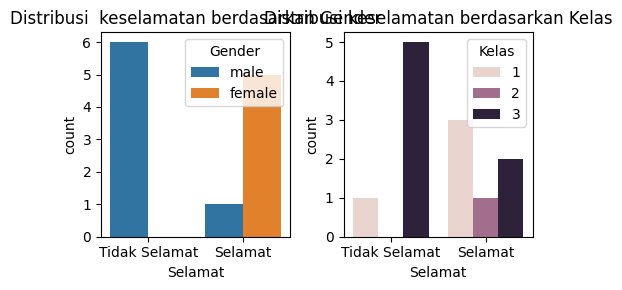

In [5]:
plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
sns.countplot(x='Selamat',hue='Gender', data=df)
plt.title('Distribusi  keselamatan berdasarkan Gender')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])

plt.subplot(1, 2, 2)
sns.countplot(x='Selamat', hue='Kelas', data=df)
plt.title('Distribusi keselamatan berdasarkan Kelas')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])

plt.tight_layout()
plt.show()


In [6]:
median_usia = df['Usia'].median()
df['Usia']= df['Usia'].fillna(median_usia)

df.drop('Kabin', axis=1, inplace=True)

print("\nInfo Data Setelah Pembersihan:")
print(df.info())


Info Data Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      12 non-null     int64  
 1   Selamat          12 non-null     int64  
 2   Kelas            12 non-null     int64  
 3   Nama             12 non-null     object 
 4   Gender           12 non-null     object 
 5   Usia             12 non-null     float64
 6   SaudaraPasangan  12 non-null     int64  
 7   OrtuAnak         12 non-null     int64  
 8   Tiket            12 non-null     object 
 9   HargaTiket       12 non-null     int64  
 10  Pelabuhan        12 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 1.2+ KB
None


In [7]:
df['ukurankeluarga'] = df['SaudaraPasangan']+df['OrtuAnak'] + 1
df.drop(['Nama', 'SaudaraPasangan', 'OrtuAnak', 'Tiket'], axis=1, inplace=True)
print("\n Setelah di rekayasa:")
print(df.head())


 Setelah di rekayasa:
   PassengerId  Selamat  Kelas  Gender  Usia  HargaTiket Pelabuhan  \
0            1        0      3    male  22.0       72500         S   
1            2        1      1  female  38.0      712830         C   
2            3        1      3  female  26.0       79250         S   
3            4        1      1  female  35.0      531000         S   
4            5        0      3    male  35.0       80500         S   

   ukurankeluarga  
0               2  
1               2  
2               1  
3               2  
4               1  


In [8]:
df = pd.get_dummies(df, columns=['Gender', 'Pelabuhan'], drop_first=True)
print("\n Data untuk jadi Model:")
print(df.head())


 Data untuk jadi Model:
   PassengerId  Selamat  Kelas  Usia  HargaTiket  ukurankeluarga  Gender_male  \
0            1        0      3  22.0       72500               2         True   
1            2        1      1  38.0      712830               2        False   
2            3        1      3  26.0       79250               1        False   
3            4        1      1  35.0      531000               2        False   
4            5        0      3  35.0       80500               1         True   

   Pelabuhan_Q  Pelabuhan_S  
0        False         True  
1        False        False  
2        False         True  
3        False         True  
4        False         True  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x = df.drop('Selamat', axis=1)
y= df['Selamat']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(x_test_scaled)
akurasi = accuracy_score(y_test, y_pred)
print(f"Prediksi model pada data uji : {y_pred}")
print(f"Jawaban aslinya : {y_test.values}")
print(f"Akurasi model : {akurasi}")

Prediksi model pada data uji : [1 0 0]
Jawaban aslinya : [1 1 0]
Akurasi model : 0.6666666666666666
